# Building and Visualizing a Dataset from Twitter

In [39]:
from textblob import TextBlob
import tweepy
import nltk
import re
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 

In [40]:
# Your Twitter app credentials need to be added here - go to https://developer.twitter.com/en/apps
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

In [41]:
twitter_auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

In [42]:
api = tweepy.API(twitter_auth)

In [43]:
# Let's grab a bunch of tweets
tweets = api.search("cobh", count=1000)

In [44]:
# Storing features from the tweets that will be useful for ML later
# This a broken in features relating to the tweet (prefixed with 'tweet_') and use related ones (prefixed with 'user_')
df = pd.DataFrame(columns=('tweet_text', 'tweet_sentiment', 'tweet_subjectivity',
                           'user_followers_count', 'user_friends_count',
                           'user_account_age', 'user_verified',
                           'user_favourites_count', 'user_tweets',
                           'tweet_retweeted', 'tweet_retweet_count', 'tweet_favorite_count'))

# Remove duplicates
df.sort_values("tweet_text", inplace = True) 
df.drop_duplicates(subset ="tweet_text", keep = False, inplace = True) 

for tweet in tweets:
    sentimentText = TextBlob(tweet.text)
    df = df.append({'tweet_text': re.sub(r'http\S+', '', tweet.text), # Removing any URL's in the tweet text here
                    'tweet_sentiment': sentimentText.sentiment.polarity,
                    'tweet_subjectivity': sentimentText.sentiment.subjectivity,
                    'user_followers_count': tweet.user.followers_count, 
                    'user_friends_count': tweet.user.friends_count,
                    'user_account_age': tweet.user.created_at,  # TODO: Convert to number of days since account creation
                    'user_verified': tweet.user.verified,
                    'user_favourites_count': tweet.user.favourites_count,
                    'user_tweets': tweet.user.statuses_count,
                    'tweet_retweeted': tweet.retweeted,
                    'tweet_retweet_count': tweet.retweet_count,
                    'tweet_favorite_count': tweet.favorite_count},
                   ignore_index=True)

df.head()

,tweet_text,tweet_sentiment,tweet_subjectivity,user_followers_count,user_friends_count,user_account_age,user_verified,user_favourites_count,user_tweets,tweet_retweeted,tweet_retweet_count,tweet_favorite_count
0,@philipnolan1 Perishing here in Cobh as well.,0.0,0.0,34,253,2017-11-29 17:06:52,False,2928,503,False,0,0
1,RT @CobhTidy: Shout out to residents in Whitep...,-0.2,0.3,2008,1613,2009-12-30 11:55:12,False,3020,14678,False,9,0
2,Four people from different households - or wha...,0.0,0.6,1092,948,2015-01-05 22:16:43,False,43961,18817,False,0,5
3,RT @buch10_04: Cobh. Ireland.,0.0,0.0,819,119,2014-12-30 13:23:59,False,16903,381201,False,7,0
4,RT @PhotosCork: This house has a guard goat 🐐\...,0.0,0.0,800,1852,2011-09-16 18:35:24,False,37914,10051,False,5,0


### Create other features for model

In [45]:
# Tweet length
df['tweet_text_length'] = df['tweet_text'].apply(lambda x: len(x) - x.count(" "))

df.head()

,tweet_text,tweet_sentiment,tweet_subjectivity,user_followers_count,user_friends_count,user_account_age,user_verified,user_favourites_count,user_tweets,tweet_retweeted,tweet_retweet_count,tweet_favorite_count,tweet_text_length
0,@philipnolan1 Perishing here in Cobh as well.,0.0,0.0,34,253,2017-11-29 17:06:52,False,2928,503,False,0,0,39
1,RT @CobhTidy: Shout out to residents in Whitep...,-0.2,0.3,2008,1613,2009-12-30 11:55:12,False,3020,14678,False,9,0,116
2,Four people from different households - or wha...,0.0,0.6,1092,948,2015-01-05 22:16:43,False,43961,18817,False,0,5,87
3,RT @buch10_04: Cobh. Ireland.,0.0,0.0,819,119,2014-12-30 13:23:59,False,16903,381201,False,7,0,26
4,RT @PhotosCork: This house has a guard goat 🐐\...,0.0,0.0,800,1852,2011-09-16 18:35:24,False,37914,10051,False,5,0,73


In [46]:
# Count of punctuation in the tweet
import string

def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    #return round(count / len(text) - text.count(" "), 3) * 100
    return count

df['tweet_text_punc_count'] = df['tweet_text'].apply(lambda x: count_punc(x))

df.head()

,tweet_text,tweet_sentiment,tweet_subjectivity,user_followers_count,user_friends_count,user_account_age,user_verified,user_favourites_count,user_tweets,tweet_retweeted,tweet_retweet_count,tweet_favorite_count,tweet_text_length,tweet_text_punc_count
0,@philipnolan1 Perishing here in Cobh as well.,0.0,0.0,34,253,2017-11-29 17:06:52,False,2928,503,False,0,0,39,2
1,RT @CobhTidy: Shout out to residents in Whitep...,-0.2,0.3,2008,1613,2009-12-30 11:55:12,False,3020,14678,False,9,0,116,4
2,Four people from different households - or wha...,0.0,0.6,1092,948,2015-01-05 22:16:43,False,43961,18817,False,0,5,87,1
3,RT @buch10_04: Cobh. Ireland.,0.0,0.0,819,119,2014-12-30 13:23:59,False,16903,381201,False,7,0,26,5
4,RT @PhotosCork: This house has a guard goat 🐐\...,0.0,0.0,800,1852,2011-09-16 18:35:24,False,37914,10051,False,5,0,73,6


### Add a wordcloud

There are 10267 words in all tweets.
There are 8423 words in  all tweets with stopwords removed.


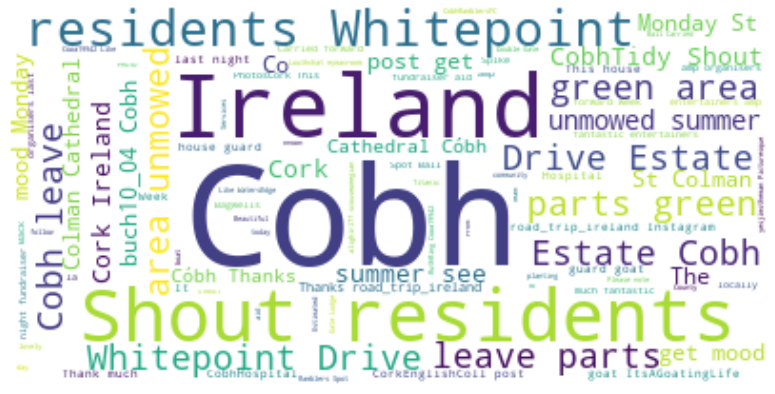

In [47]:
# Setup stop words first
stop_words = stopwords.words('english') 
new_stopwords = ['RT']
stop_words.extend(new_stopwords)
stop_words = set(stop_words)

# Remove stopwords
text = " ".join(review for review in df.tweet_text)
clean_text = " ".join(word for word in text.split() if word not in stop_words)

print ("There are {} words in all tweets.".format(len(text)))
print ("There are {} words in  all tweets with stopwords removed.".format(len(clean_text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(clean_text)

plt.figure( figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

### Sentiment of tweets

In [48]:
# Sentiment of the tweets - using TextBlob for this
print ("Total Tweet count: {}" .format(len(df)))
print ("The average sentiment of the tweets is {} ".format(df["tweet_sentiment"].mean()))

positive_tweets_count = 0
negative_tweets_count = 0
neutral_tweets_count = 0

for index, tweet in df.iterrows():
    #print(tweet['tweet_sentiment'])
    if tweet['tweet_sentiment'] > 0:
        positive_tweets_count += 1
    elif tweet['tweet_sentiment'] < 0:
        negative_tweets_count += 1
    else:
        neutral_tweets_count += 1

print("\nPercentage of positive tweets: {}%".format(positive_tweets_count*100/len(df)))
print("Percentage of negative tweets: {}%".format(negative_tweets_count*100/len(df)))
print("Percentage of neutral tweets: {}%".format(neutral_tweets_count*100/len(df)))

Total Tweet count: 100
The average sentiment of the tweets is 0.08607846320346318 

Percentage of positive tweets: 33.0%
Percentage of negative tweets: 18.0%
Percentage of neutral tweets: 49.0%
